##  Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

## Load the dataset

In [5]:
df = pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Remove duplicates

In [7]:
df = df.drop_duplicates()

## Is there any Null Value present in any column ?

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Drop nan values

In [245]:
df = df.dropna()
df = df.fillna('')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


## Change columns datatype

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(),format="%B %d, %Y")

In [40]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Q1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [46]:
df.loc[df['title']=='House of Cards']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,2021-04-14,2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


## Q2) In which year the highest number of the TV Shows & Movies were released ? 

<Axes: xlabel='release_year'>

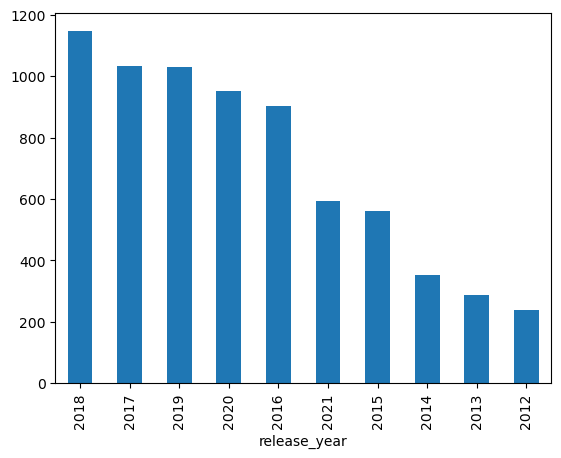

In [69]:
most_released_year = df.groupby('release_year')['title'].count().nlargest(10)
most_released_year.plot(kind='bar')

## Q3) How many Movies & TV Shows are in the dataset ?

In [90]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

## Q4) Show all the Movies that were released in year 2000

In [103]:
df.loc[(df['release_year']==2000) & (df['type']=='Movie'),'title']

180                    The Nutty Professor II: The Klumps
350                                         Space Cowboys
359                          The Original Kings of Comedy
566                                      Charlie's Angels
593                                              Snow Day
779                                     Battlefield Earth
952                                  The Whole Nine Yards
3472                          Rugrats in Paris: The Movie
4545               Monty Python: Before the Flying Circus
4723                                                 Fiza
4956                          Phir Bhi Dil Hai Hindustani
5953                               Joseph: King of Dreams
6006                                              28 Days
6147                                      American Psycho
6154    An American Tail: The Treasures of Manhattan I...
6311                                         Billy Elliot
6437                                         Center Stage
6440          

##  Q5) Show only the Titles of all TV Shows that were released in India only

In [110]:
df.loc[(df['type']=='TV Show') & (df['country']=='India'),'title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

## Q6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [123]:
df['director'].value_counts().head(10)

director
                          2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

## Q7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [141]:
df.loc[((df['type']=='Movie') & (df['listed_in']=='Comedies')) | (df['country']=='United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
32,s33,TV Show,Sex Education,,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2021-09-17,2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
65,s66,TV Show,Numberblocks,,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,2021-09-15,2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
72,s73,TV Show,Jack Whitehall: Travels with My Father,,"Jack Whitehall, Michael Whitehall",United Kingdom,2021-09-14,2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...
...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,,Dougray Scott,United Kingdom,2017-03-31,2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...
8741,s8742,TV Show,Wild Arabia,,Alexander Siddig,United Kingdom,2017-03-31,2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8744,s8745,Movie,Williams,Morgan Matthews,,United Kingdom,2017-11-04,2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...
8758,s8759,TV Show,World's Busiest Cities,,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."


## Q8) In how many movies/shows, Tom Cruise was cast ?

In [152]:
df.loc[df['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


## Q9) What are the different Ratings defined by Netflix ?

In [161]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '',
       'TV-Y7-FV', 'UR'], dtype=object)

In [163]:
df['rating'].nunique()

18

## Q10) How many Movies got the 'TV-14' rating, in Canada ?

In [180]:
df.loc[(df['type']=='Movie') & (df['rating']=='TV-14') & (df['country']=='Canada')].shape[0]

13

## Q11)  How many TV Shows got the 'TV-MA' rating, after year 2018 ?

In [187]:
df.loc[(df['type']=='TV Show') & (df['rating']=='TV-MA') & (df['release_year']>2018)].shape[0]

623

## Q12) What is the maximum duration of a Movie/Show on Netflix ?

In [194]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [198]:
df[['minutes','unit']] = df['duration'].str.split(' ',expand=True)

In [202]:
df['minutes'] = pd.to_numeric(df['minutes'])

In [206]:
df['minutes'].max()

312.0

## Q13) Which individual country has the Highest No. of TV Shows ?

In [240]:
df.loc[(df['type']=='TV Show'),'country'].value_counts().head(1)

country
United States    760
Name: count, dtype: int64